# **HEART DISEASE PREDICTION**


---











**Importing necessary libraries**

In [3]:
# Regular EDA and plotting librarires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# Training
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
#Metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
#Tuning
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

#Ignoring the warnings
import warnings
warnings.filterwarnings("ignore")

Importing the dataset

In [4]:
data_p = pd.read_csv("/content/Heart_Disease_Prediction.csv")

In [5]:
# Shape of the dataset
data_p.shape


(270, 14)

In [6]:
# Head of the dataset
data_p.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


# Exploratory Data Analysis

In [7]:
# Show the non null count and datatypes of the variables
data_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [8]:
data_p.columns


Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [9]:
# Check unique values in each column
for column in data_p.columns:
    unique_values = data_p[column].unique()
    print(f"Unique values in {column} column: {unique_values}")


Unique values in Age column: [70 67 57 64 74 65 56 59 60 63 53 44 61 71 46 40 48 43 47 54 51 58 66 37
 50 42 62 49 52 45 41 76 39 35 55 34 38 69 68 77 29]
Unique values in Sex column: [1 0]
Unique values in Chest pain type column: [4 3 2 1]
Unique values in BP column: [130 115 124 128 120 110 140 150 135 142 134 112 132 138 160 170 144 122
 152 101 126 118 136 105 174 145 108 156 106 104  94 146 148 178 125 100
 165 180 158 200 117 192 123 129 102 155 172]
Unique values in Cholesterol column: [322 564 261 263 269 177 256 239 293 407 234 226 235 303 149 311 203 211
 199 229 245 204 288 275 243 295 230 265 228 215 326 200 207 273 180 222
 223 209 233 197 218 246 225 315 205 417 195 198 166 178 249 281 126 305
 240 276 319 242 260 354 309 208 236 270 214 201 244 306 221 330 266 206
 212 302 313 141 237 289 254 274 258 160 327 304 271 283 188 286 360 267
 196 232 277 210 213 282 167 224 268 250 219 217 308 193 231 262 259 325
 299 182 294 298 409 172 184 394 174 255 248 300 318 216 252 227

In [10]:
# Count the occurrences of each class in the target variable
heart_disease_counts = data_p['Heart Disease'].value_counts()

# print the counts:
infected = heart_disease_counts[1]
not_infected = heart_disease_counts[0]
print(f"{infected} were infected with heart disease.\n{not_infected} were not infected with heart disease.")


120 were infected with heart disease.
150 were not infected with heart disease.


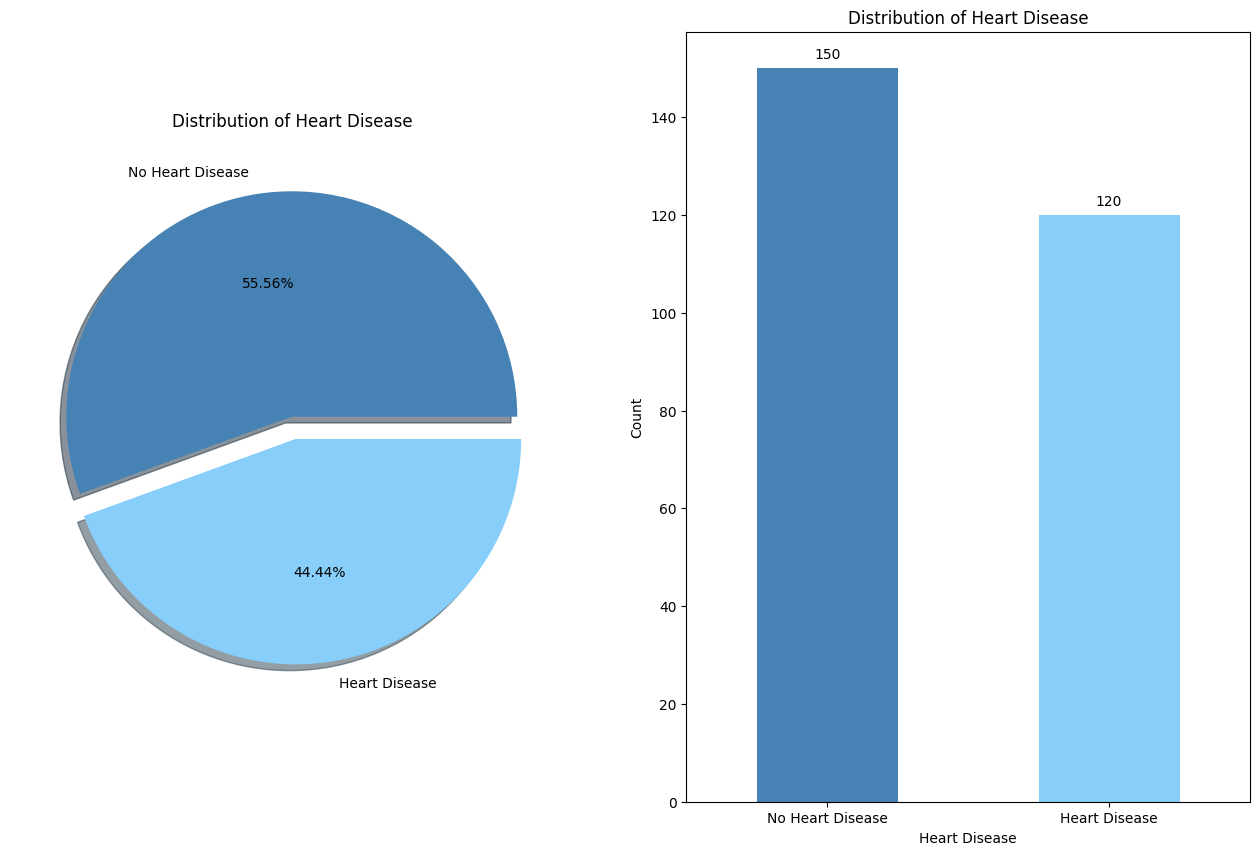

In [11]:
import matplotlib.pyplot as plt

# Replace 'Presence' with 'Heart Disease' and 'Absence' with 'No Heart Disease'
data_p['Heart Disease'] = data_p['Heart Disease'].replace({'Presence': 'Heart Disease', 'Absence': 'No Heart Disease'})

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 10))

# Pie chart
data_p['Heart Disease'].value_counts().plot(
    kind='pie', colors=["#4682B4", "#87CEFA"], ax=ax[0], explode=[0, 0.1], autopct='%1.2f%%', shadow=True
)
ax[0].set_ylabel('')
ax[0].set_title('Distribution of Heart Disease')

# Bar chart
data_p['Heart Disease'].value_counts().plot(
    kind='bar', color=["#4682B4", "#87CEFA"], ax=ax[1]
)

# Add labels to the bar chart
for p in ax[1].patches:
    ax[1].annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', xytext=(0, 10), textcoords='offset points')

ax[1].set_ylabel('Count')
ax[1].set_xlabel('Heart Disease')
ax[1].set_xticklabels(["No Heart Disease", "Heart Disease"], rotation=0)
ax[1].set_title('Distribution of Heart Disease')

plt.show()


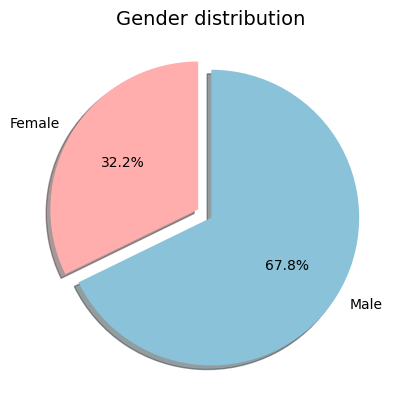

In [12]:
# check gender distribution in the dataset
gender_dist = data_p.groupby('Sex')[['Sex']].count()
colors_list = ['blue', 'darksalmon']
plt.pie(gender_dist['Sex'], labels = ['Female','Male'], autopct = '%1.1f%%', colors=['#ffadad','#89c2d9'],shadow=True, startangle=90,explode=[0.1, 0.005])
plt.title("Gender distribution",color = 'black', fontsize = '14')
plt.show()

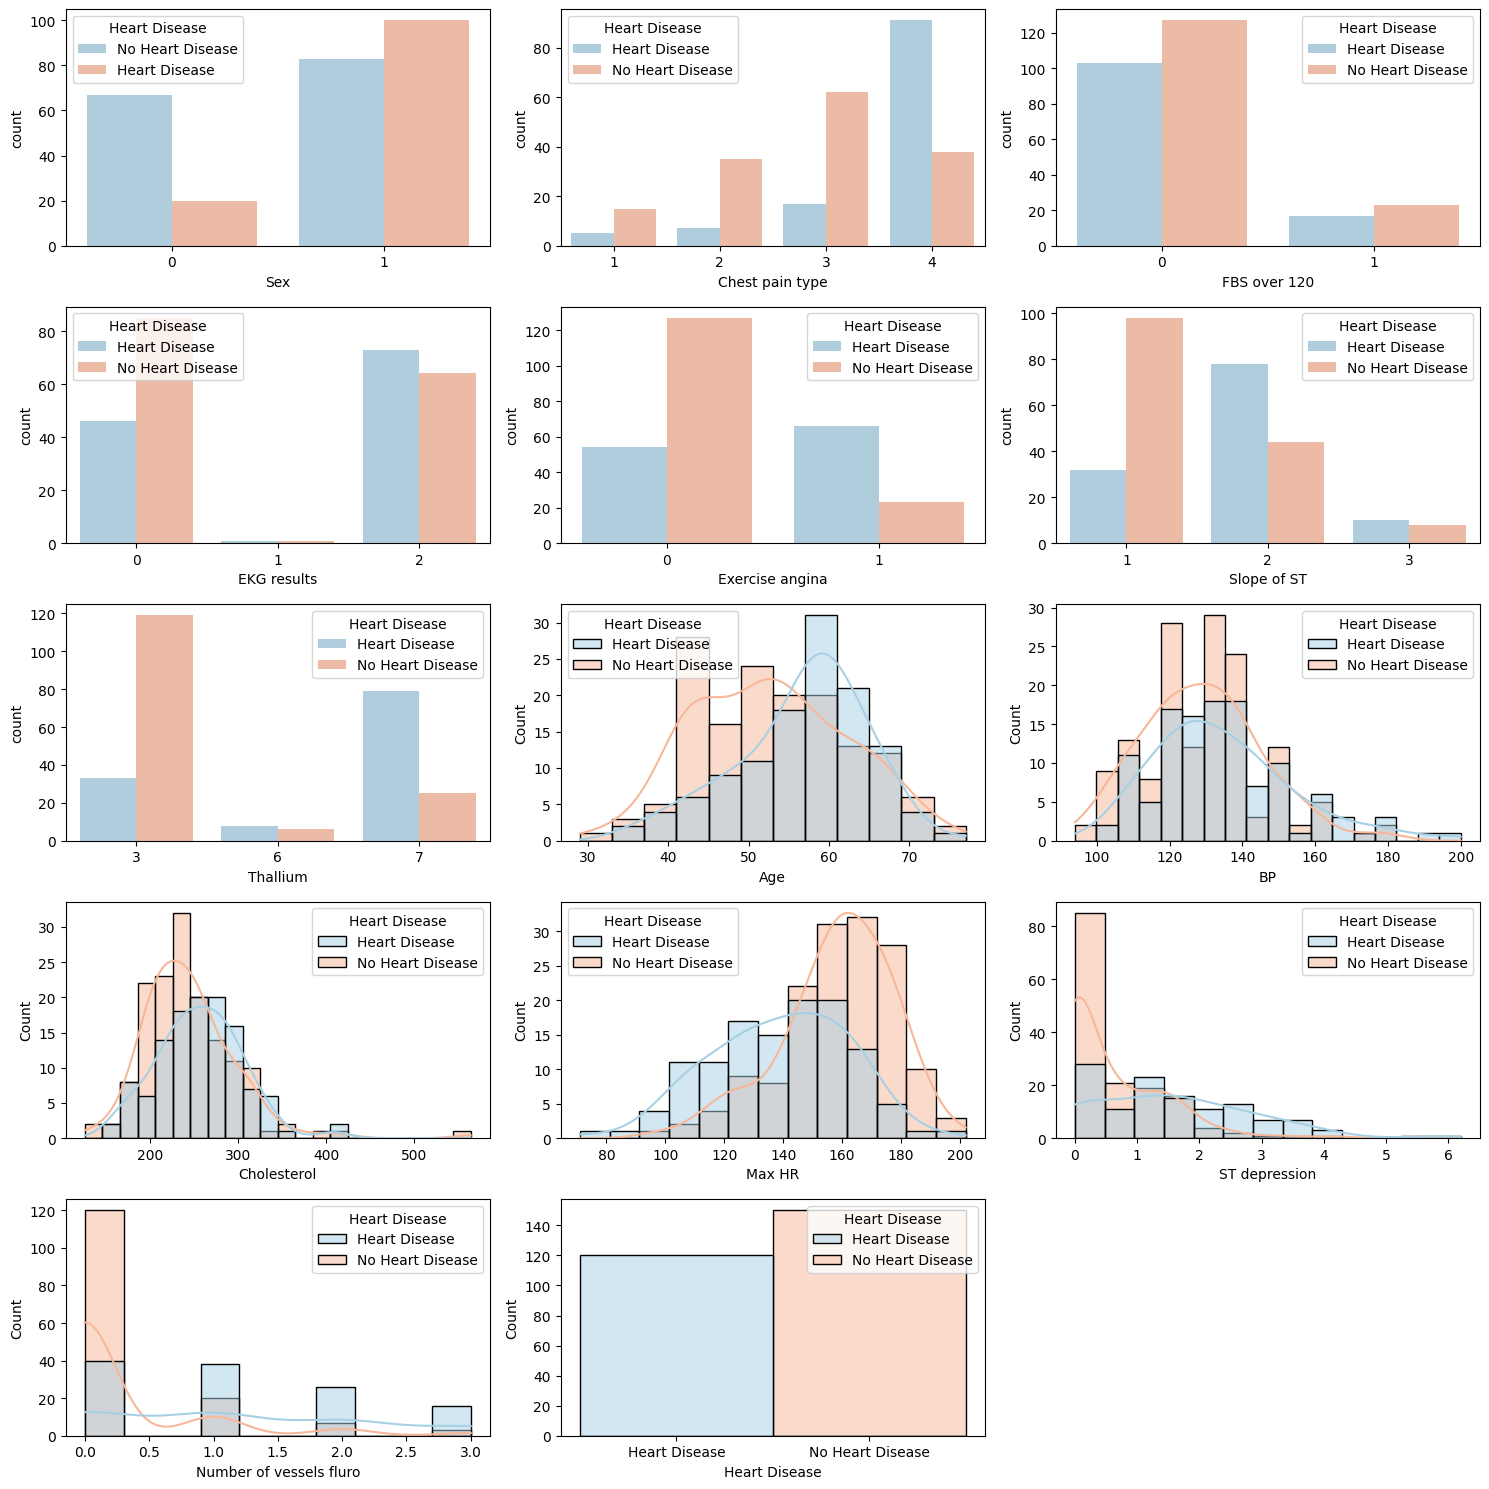

In [13]:
# Manually specify categorical variables (excluding 'Heart Disease')
categorical_vars = ['Sex', 'Chest pain type', 'FBS over 120', 'EKG results', 'Exercise angina', 'Slope of ST', 'Thallium']

# Identify continuous variables (excluding 'Heart Disease')
continuous_vars = [col for col in data_p.columns if col not in categorical_vars]

# Calculate the number of rows and columns needed for subplots
num_subplots = len(categorical_vars) + len(continuous_vars)
num_cols = 3  # Set the number of columns to a fixed value
num_rows = (num_subplots // num_cols) + (num_subplots % num_cols > 0)  # Calculate the number of rows needed

# Set up subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))
axs = axs.flatten()

# Categorical variables count plots
for i, var in enumerate(categorical_vars):
    sns.countplot(x=var, data=data_p, hue='Heart Disease', ax=axs[i], palette='RdBu_r')

# Continuous variables histograms
for i, var in enumerate(continuous_vars):
    sns.histplot(data=data_p, x=var, kde=True, hue='Heart Disease', ax=axs[len(categorical_vars) + i], palette='RdBu_r')

# Hide unused subplots
for j in range(num_subplots, len(axs)):
    axs[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


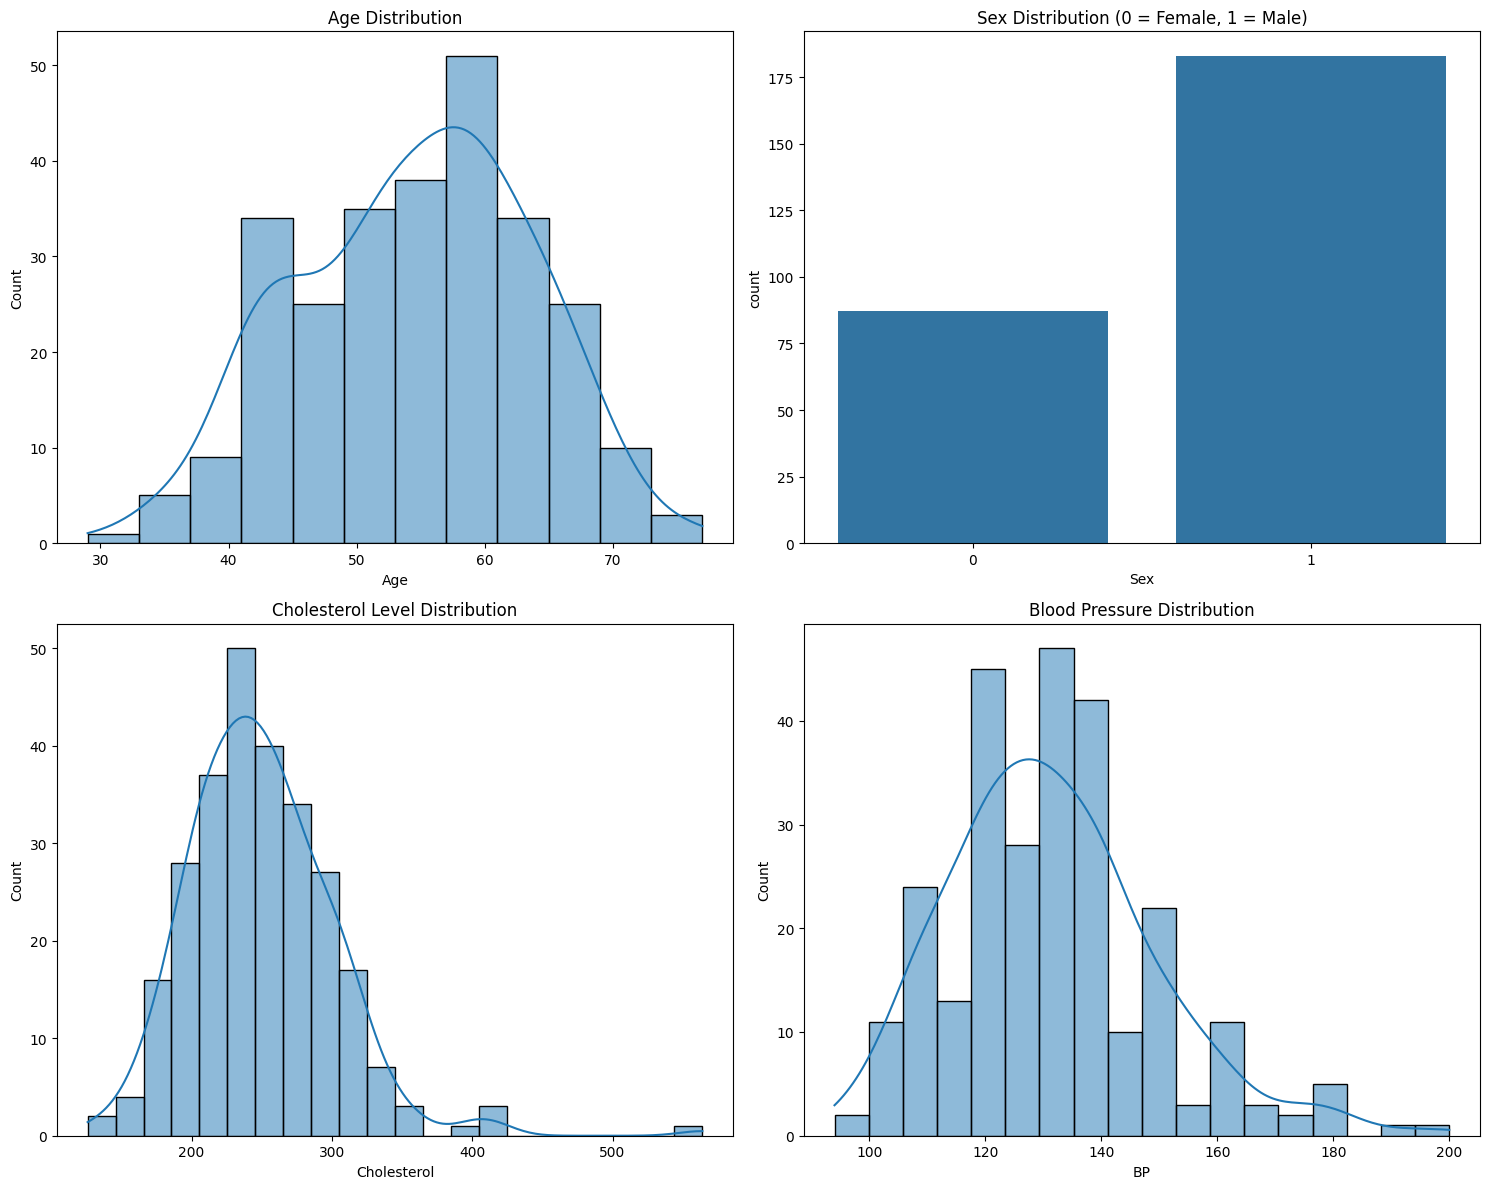

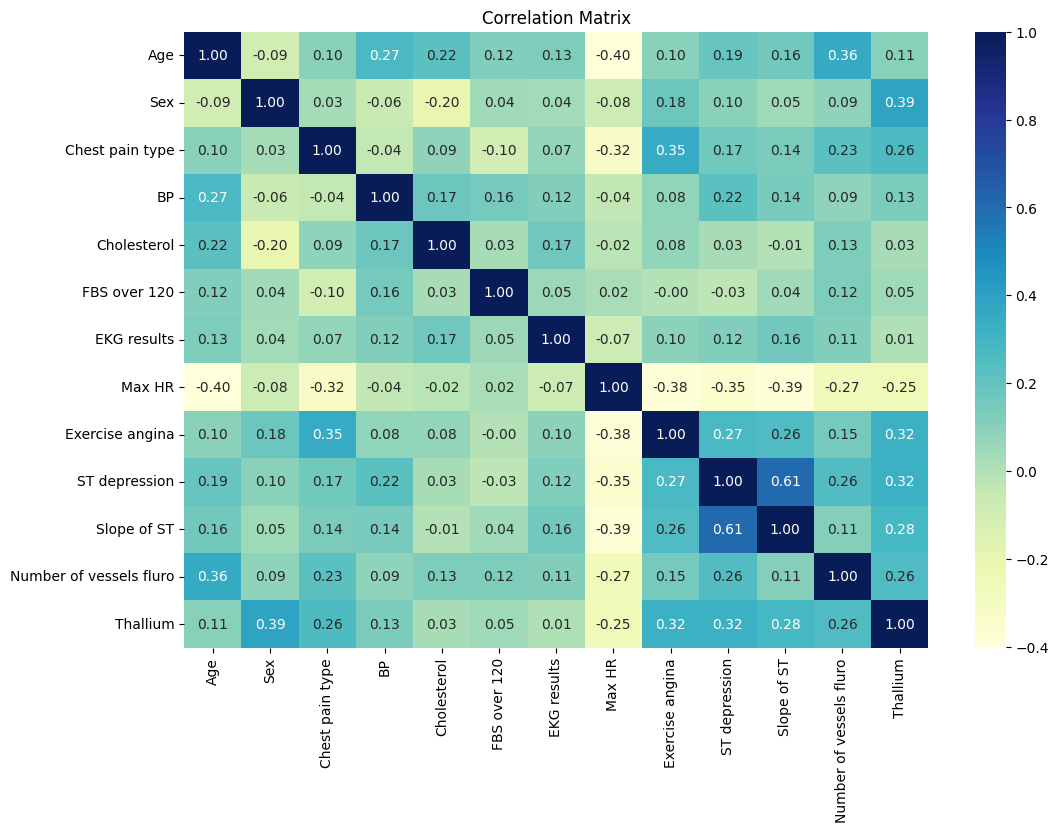

In [14]:
# Descriptive Analysis - Distribution of Key Variables
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

sns.histplot(data_p['Age'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

sns.countplot(x=data_p['Sex'], ax=axes[0, 1])
axes[0, 1].set_title('Sex Distribution (0 = Female, 1 = Male)')

sns.histplot(data_p['Cholesterol'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Cholesterol Level Distribution')

sns.histplot(data_p['BP'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Blood Pressure Distribution')

plt.tight_layout()

# Correlation Analysis
plt.figure(figsize=(12, 8))
sns.heatmap(data_p.corr(), annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Correlation Matrix")

plt.show()


Data Cleaning and Preprocessing

In [15]:
#Checking missing values
data_p.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [16]:
# Calculate the number of samples in each class
num_class_0 = np.sum(data_p.values == 0)
num_class_1 = np.sum(data_p.values == 1)


# Calculate the class imbalance ratio
class_imbalance_ratio = num_class_0 / (num_class_0 + num_class_1)
print(f"Class imbalance ratio: {class_imbalance_ratio}")

Class imbalance ratio: 0.6207386363636364


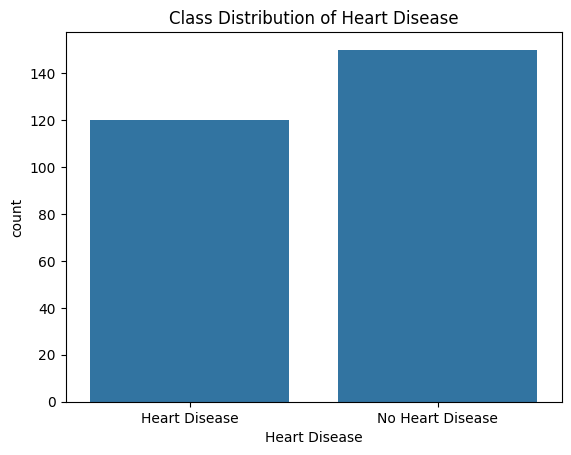

In [17]:
sns.countplot(x='Heart Disease', data=data_p)
plt.title('Class Distribution of Heart Disease')
plt.show()


In [18]:
#Checking duplicate values
data_dup = data_p.duplicated().any()
data_dup

False

In [19]:
data_p.shape

(270, 14)

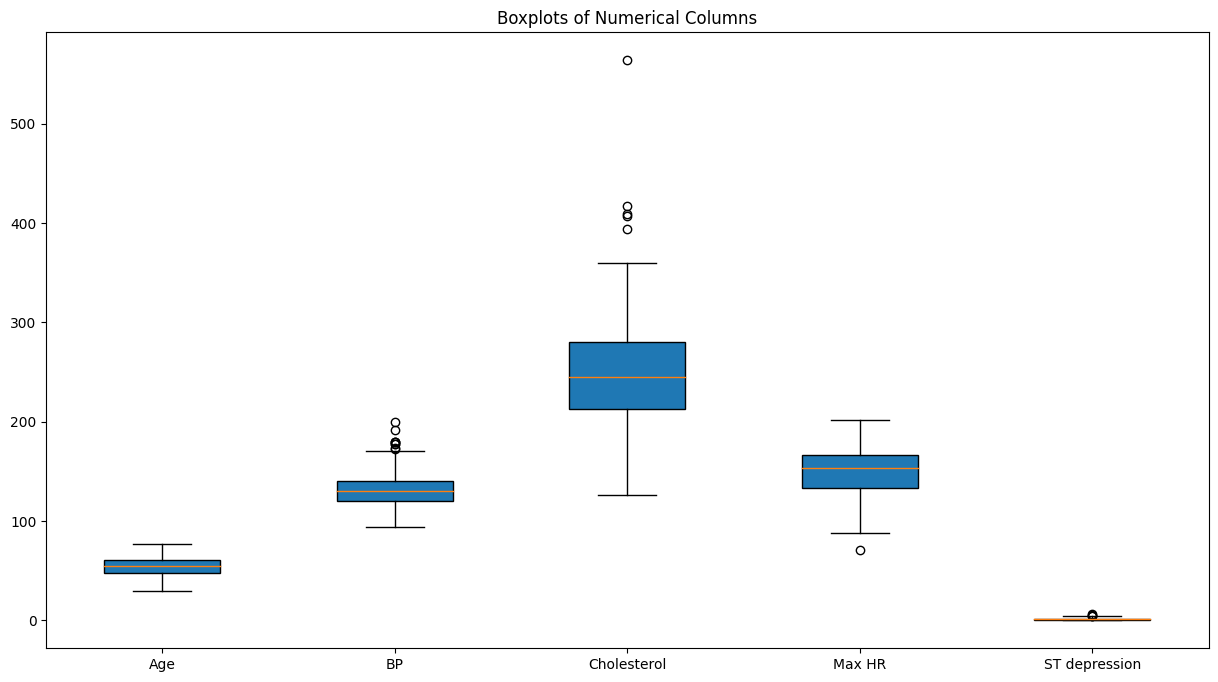

In [20]:
# Visualize boxplots to identify outliers
numerical_columns = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression']

plt.figure(figsize=(15, 8))
bp = plt.boxplot(data_p[numerical_columns].values, patch_artist=True)

# Customize fill color
for box in bp['boxes']:
    box.set_facecolor('#1f78b4')

# Set x-axis tick labels
plt.xticks(range(1, len(numerical_columns) + 1), numerical_columns)

plt.title('Boxplots of Numerical Columns')
plt.show()


In [21]:
def handle_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with the median of the column
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), df[column].median(), df[column])

# Apply the function to handle outliers for each numerical column
for column in numerical_columns:
    handle_outliers_iqr(data_p, column)


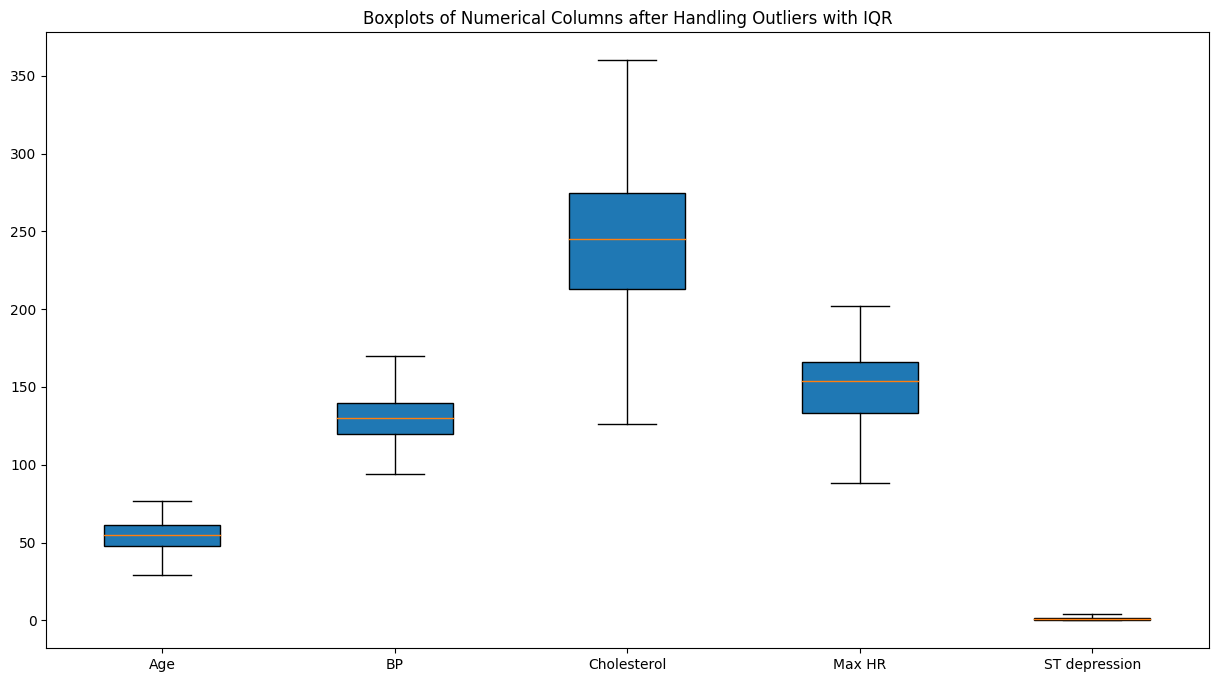

In [22]:
# Visualize boxplots after handling outliers with IQR
plt.figure(figsize=(15, 8))
bp = plt.boxplot(data_p[numerical_columns].values, patch_artist=True)

# Customize fill color
for box in bp['boxes']:
    box.set_facecolor('#1f78b4')

# Set x-axis tick labels
plt.xticks(range(1, len(numerical_columns) + 1), numerical_columns)

plt.title('Boxplots of Numerical Columns after Handling Outliers with IQR')
plt.show()


In [23]:
# Checking the shape after data cleaning
print("Shape after Data Cleaning:", data_p.shape)

Shape after Data Cleaning: (270, 14)


Feature Encoding

In [24]:
# Perform one-hot encoding for categorical variables
data_p_encoded = pd.get_dummies(data_p, columns=['Sex', 'Chest pain type', 'FBS over 120', 'EKG results', 'Exercise angina', 'Slope of ST', 'Thallium'], drop_first=True)

# Display the first few rows of the encoded dataset
data_p_encoded.head()


,Age,BP,Cholesterol,Max HR,ST depression,Number of vessels fluro,Heart Disease,Sex_1,Chest pain type_2,Chest pain type_3,Chest pain type_4,FBS over 120_1,EKG results_1,EKG results_2,Exercise angina_1,Slope of ST_2,Slope of ST_3,Thallium_6,Thallium_7
0,70.0,130.0,322.0,109.0,2.4,3,Heart Disease,1,0,0,1,0,0,1,0,1,0,0,0
1,67.0,115.0,245.0,160.0,1.6,0,No Heart Disease,0,0,1,0,0,0,1,0,1,0,0,1
2,57.0,124.0,261.0,141.0,0.3,0,Heart Disease,1,1,0,0,0,0,0,0,0,0,0,1
3,64.0,128.0,263.0,105.0,0.2,1,No Heart Disease,1,0,0,1,0,0,0,1,1,0,0,1
4,74.0,120.0,269.0,121.0,0.2,1,No Heart Disease,0,1,0,0,0,0,1,1,0,0,0,0


Splitting the data

In [25]:
# Separate the features (X) and target (y) using the encoded DataFrame
X = data_p_encoded.drop('Heart Disease', axis=1)
y = data_p_encoded['Heart Disease']

# Split the data into training and testing sets
# Assuming X and y are your features and target variable
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

Feature Selection

In [26]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
from imblearn.over_sampling import SMOTE
# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)



**Model Development**

In [87]:
from sklearn.feature_selection import SelectFromModel

# Model Development
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(probability=True)
}

# Dictionary to store the models with selected features
selected_models = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Model Evaluation
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"\n{model}\nAccuracy: {accuracy:.4f}\nPrecision: {precision:.4f}\nRecall: {recall:.4f}\nF1 Score: {f1:.4f}\n")

    if name == 'Random Forest':
        # Store feature importances for Random Forest
        feature_importances = model.feature_importances_

        # Use SelectFromModel to automatically select features above a certain threshold
        sfm = SelectFromModel(model, threshold='median')
        sfm.fit(X_train, y_train)

        # Transform the features
        X_train_selected = sfm.transform(X_train)
        X_test_selected = sfm.transform(X_test)

        # Retrain the Random Forest model with the selected features
        model_selected = RandomForestClassifier(random_state=42)
        model_selected.fit(X_train_selected, y_train)

        # Store the model with selected features
        selected_models[name] = model_selected

        # Print the selected features for Random Forest
        selected_feature_indices = [i for i, selected in enumerate(sfm.get_support()) if selected]
        print(f"Selected Features for Random Forest: {selected_feature_indices}")

        # Model Evaluation on the selected features
        y_pred_selected = model_selected.predict(X_test_selected)
        accuracy_selected = accuracy_score(y_test, y_pred_selected)
        precision_selected = precision_score(y_test, y_pred_selected, average='weighted')
        recall_selected = recall_score(y_test, y_pred_selected, average='weighted')
        f1_selected = f1_score(y_test, y_pred_selected, average='weighted')

        print(f"\n{model_selected}\nAccuracy (Selected Features): {accuracy_selected:.4f}\nPrecision (Selected Features): {precision_selected:.4f}\nRecall (Selected Features): {recall_selected:.4f}\nF1 Score (Selected Features): {f1_selected:.4f}\n")

Training Logistic Regression...

LogisticRegression()
Accuracy: 0.8049
Precision: 0.8569
Recall: 0.8049
F1 Score: 0.7939

Training Decision Tree...

DecisionTreeClassifier()
Accuracy: 0.7073
Precision: 0.7113
Recall: 0.7073
F1 Score: 0.7023

Training Random Forest...

RandomForestClassifier()
Accuracy: 0.8780
Precision: 0.9006
Recall: 0.8780
F1 Score: 0.8750

Selected Features for Random Forest: [0, 1, 2, 3, 4, 5, 9, 13, 17]

RandomForestClassifier(random_state=42)
Accuracy (Selected Features): 0.7805
Precision (Selected Features): 0.7947
Recall (Selected Features): 0.7805
F1 Score (Selected Features): 0.7751

Training Support Vector Machine...

SVC(probability=True)
Accuracy: 0.7805
Precision: 0.7947
Recall: 0.7805
F1 Score: 0.7751




Top Feature Importance for Selected Features:
Age: 0.15272946658635064
BP: 0.10961070638464272
Cholesterol: 0.09867046635589842
Max HR: 0.09458293699367
ST depression: 0.08333389474921374
Number of vessels fluro: 0.08282185343607068
Chest pain type_4: 0.07686752461530398
Exercise angina_1: 0.07428175479134458
Thallium_7: 0.06413468076040892


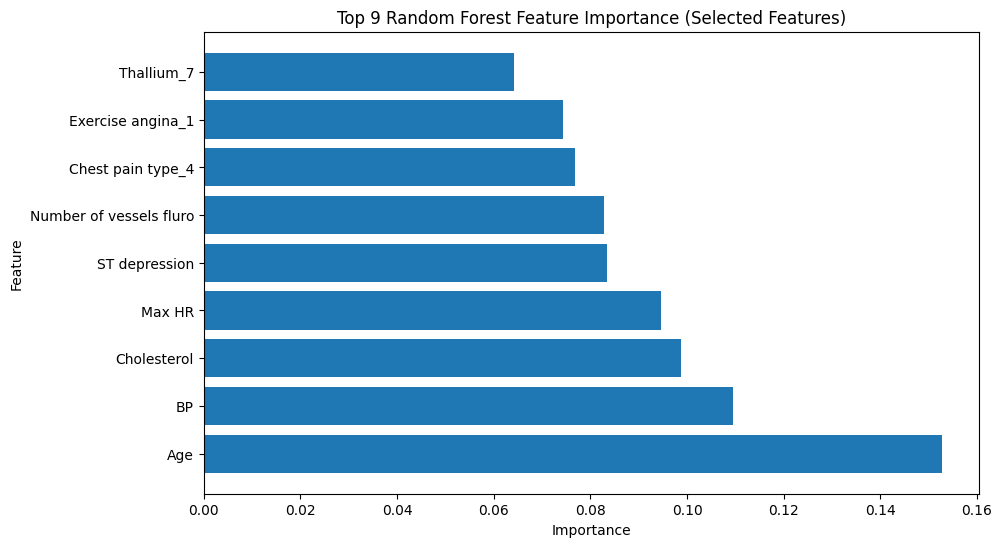

In [88]:
# Extract feature names and sorted indices for selected features
selected_feature_names = X.columns[sfm.get_support()]
selected_sorted_idx = feature_importances.argsort()[::-1]
selected_top_n = min(top_n, len(selected_feature_names))  # Ensure not exceeding the number of selected features
selected_feature_importances = feature_importances[selected_sorted_idx[:selected_top_n]]

print("\nTop Feature Importance for Selected Features:")
for i in range(selected_top_n):
    print(f"{selected_feature_names[i]}: {selected_feature_importances[i]}")

# Plot top N feature importance for selected features as horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(range(selected_top_n), selected_feature_importances, align="center")
plt.yticks(range(selected_top_n), selected_feature_names)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.title(f"Top {selected_top_n} Random Forest Feature Importance (Selected Features)")
plt.show()


In [85]:
# Cross-Validation
for name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"Cross-validation scores for {name}: {cv_scores}")
    print(f"Average Accuracy: {cv_scores.mean():.4f}\n")

Cross-validation scores for Logistic Regression: [0.77777778 0.83333333 0.87037037 0.81481481 0.88888889]
Average Accuracy: 0.8370

Cross-validation scores for Decision Tree: [0.62962963 0.75925926 0.77777778 0.81481481 0.75925926]
Average Accuracy: 0.7481

Cross-validation scores for Random Forest: [0.74074074 0.7962963  0.83333333 0.87037037 0.87037037]
Average Accuracy: 0.8222

Cross-validation scores for Support Vector Machine: [0.61111111 0.72222222 0.68518519 0.61111111 0.62962963]
Average Accuracy: 0.6519



In [89]:
from sklearn.feature_selection import SelectFromModel

param_grids = {
    'Logistic Regression': {'C': [0.001, 0.01, 0.1, 1, 10, 100]},
    'Decision Tree': {'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, 20, 30],
                      'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
    'Random Forest': {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20, 30],
                      'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
    'Support Vector Machine': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
}

# Dictionary to store the best models with selected features
best_models = {}

for name, model in models.items():
    print(f"Tuning hyperparameters for {name}...")

    if name == 'Random Forest':
        # Use SelectFromModel to get the most important features
        sfm = SelectFromModel(model, threshold='median')
        sfm.fit(X_train, y_train)

        # Get selected features indices
        selected_features = sfm.get_support(indices=True)

        # Apply feature selection to training set
        X_train_selected = X_train[:, selected_features]

    else:
        # If not Random Forest, use the original features
        X_train_selected = X_train

    # Define hyperparameter grid
    param_grid = param_grids[name]

    # Initialize GridSearchCV with the model and hyperparameter grid
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

    # Use training set with selected features for hyperparameter tuning
    grid_search.fit(X_train_selected, y_train)

    # Get best hyperparameters and model with selected features
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    best_model = grid_search.best_estimator_

    # Store the best model with selected features
    best_models[name] = (best_model, selected_features)

    print(f"Best Parameters: {best_params}")
    print(f"Best Accuracy: {best_score:.4f}\n")

# Evaluate the best models on the test set
for name, (best_model, selected_features) in best_models.items():
    if name == 'Random Forest':
        # Apply feature selection to test set only for Random Forest
        X_test_selected = X_test[:, selected_features]
    else:
        # If not Random Forest, use the original features
        X_test_selected = X_test

    y_pred = best_model.predict(X_test_selected)

    # Model Evaluation
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"\n{name} (Best Model with Selected Features)\nAccuracy: {accuracy:.4f}\nPrecision: {precision:.4f}\nRecall: {recall:.4f}\nF1 Score: {f1:.4f}\n")


Tuning hyperparameters for Logistic Regression...
Best Parameters: {'C': 10}
Best Accuracy: 0.8624

Tuning hyperparameters for Decision Tree...
Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 5}
Best Accuracy: 0.7882

Tuning hyperparameters for Random Forest...
Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 150}
Best Accuracy: 0.8307

Tuning hyperparameters for Support Vector Machine...
Best Parameters: {'C': 10, 'kernel': 'linear'}
Best Accuracy: 0.8521


Logistic Regression (Best Model with Selected Features)
Accuracy: 0.8049
Precision: 0.8569
Recall: 0.8049
F1 Score: 0.7939


Decision Tree (Best Model with Selected Features)
Accuracy: 0.7073
Precision: 0.7113
Recall: 0.7073
F1 Score: 0.7023


Random Forest (Best Model with Selected Features)
Accuracy: 0.8049
Precision: 0.8302
Recall: 0.8049
F1 Score: 0.7983


Support Vector Machine (Best Model with Selected Features)
Accura

In [32]:
# Initialize empty dictionaries to store metrics
'''validation_metrics = {'Accuracy': [], 'Precision': [], 'Recall': [], 'F1': []}
test_metrics = {'Accuracy': [], 'Precision': [], 'Recall': [], 'F1': []}
''''

In [90]:
# Validation and Testing
for name, model in models.items():
    print(f"\n{name}\n")

    # Model Evaluation on Validation Set
    y_val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_precision = precision_score(y_val, y_val_pred, average='weighted')
    val_recall = recall_score(y_val, y_val_pred, average='weighted')
    val_f1 = f1_score(y_val, y_val_pred, average='weighted')

    print(f"Validation Accuracy: {val_accuracy:.4f}\nValidation Precision: {val_precision:.4f}\nValidation Recall: {val_recall:.4f}\nValidation F1 Score: {val_f1:.4f}\n")

    # Model Evaluation on Test Set
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, average='weighted')
    test_recall = recall_score(y_test, y_test_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')

    print(f"Test Accuracy: {test_accuracy:.4f}\nTest Precision: {test_precision:.4f}\nTest Recall: {test_recall:.4f}\nTest F1 Score: {test_f1:.4f}\n")



Logistic Regression

Validation Accuracy: 0.3250
Validation Precision: 0.1056
Validation Recall: 0.3250
Validation F1 Score: 0.1594

Test Accuracy: 0.8049
Test Precision: 0.8569
Test Recall: 0.8049
Test F1 Score: 0.7939


Decision Tree

Validation Accuracy: 0.3250
Validation Precision: 0.1056
Validation Recall: 0.3250
Validation F1 Score: 0.1594

Test Accuracy: 0.7073
Test Precision: 0.7113
Test Recall: 0.7073
Test F1 Score: 0.7023


Random Forest

Validation Accuracy: 0.3750
Validation Precision: 0.7862
Validation Recall: 0.3750
Validation F1 Score: 0.2588

Test Accuracy: 0.8780
Test Precision: 0.9006
Test Recall: 0.8780
Test F1 Score: 0.8750


Support Vector Machine

Validation Accuracy: 0.3250
Validation Precision: 0.1056
Validation Recall: 0.3250
Validation F1 Score: 0.1594

Test Accuracy: 0.7805
Test Precision: 0.7947
Test Recall: 0.7805
Test F1 Score: 0.7751



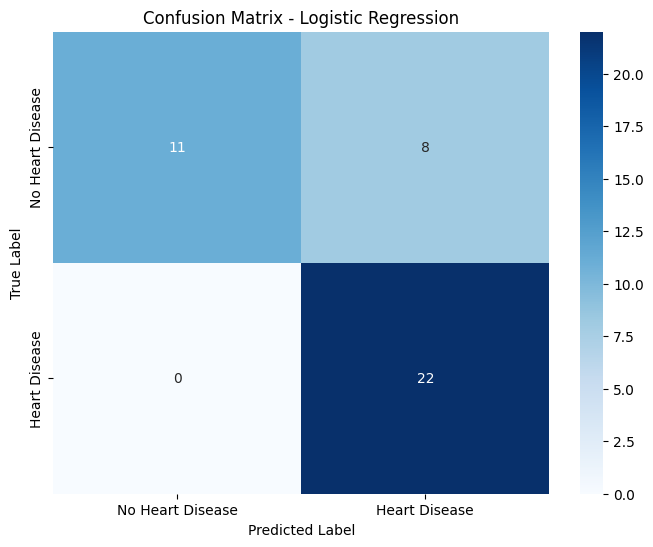

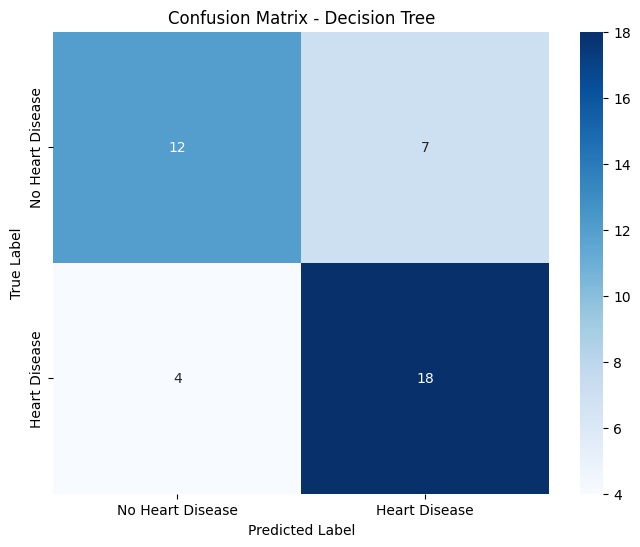

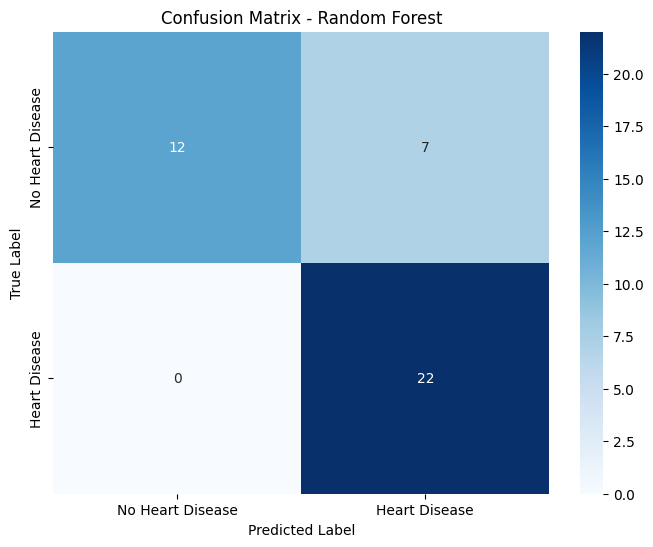

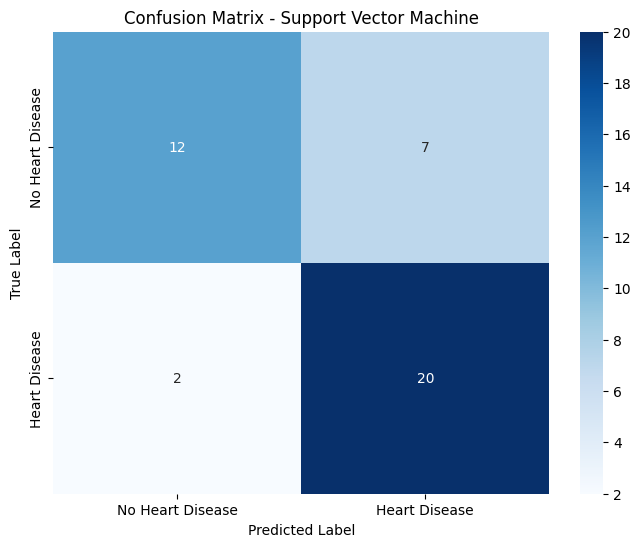

In [34]:
# Function to plot confusion matrix
def plot_confusion_matrix_custom(model, X, y_true, display_labels=['No Heart Disease', 'Heart Disease']):
    y_pred = model.predict(X)
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=display_labels, yticklabels=display_labels)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

for name, model in models.items():
    plot_confusion_matrix_custom(model, X_test, y_test)

Plotting ROC curve for Logistic Regression...


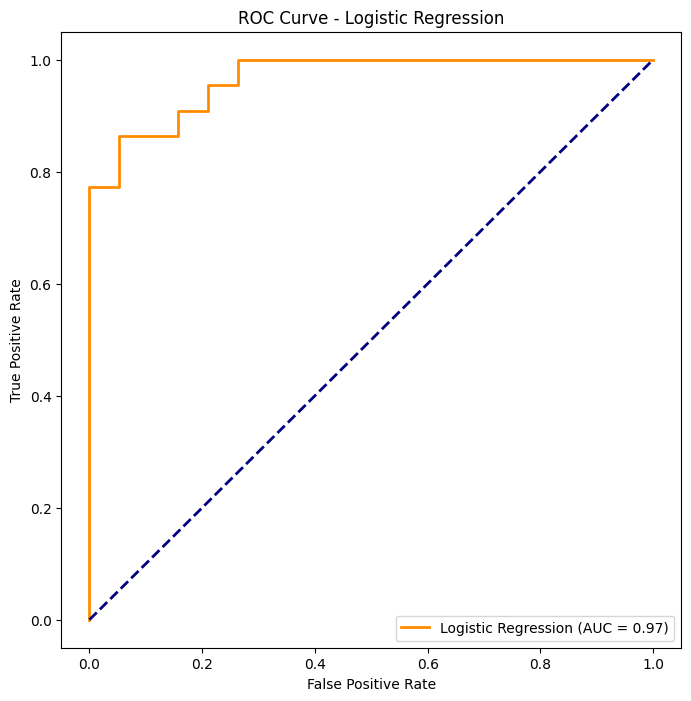

Plotting ROC curve for Decision Tree...


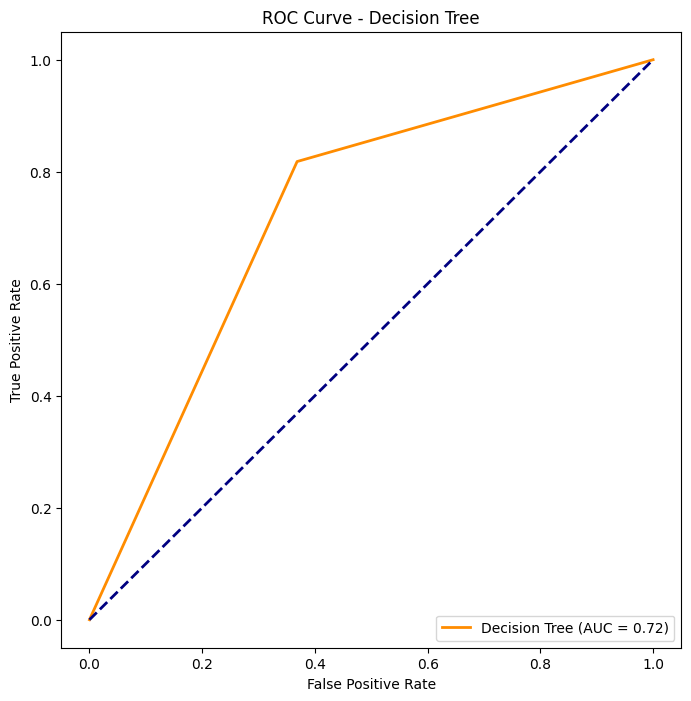

Plotting ROC curve for Random Forest...


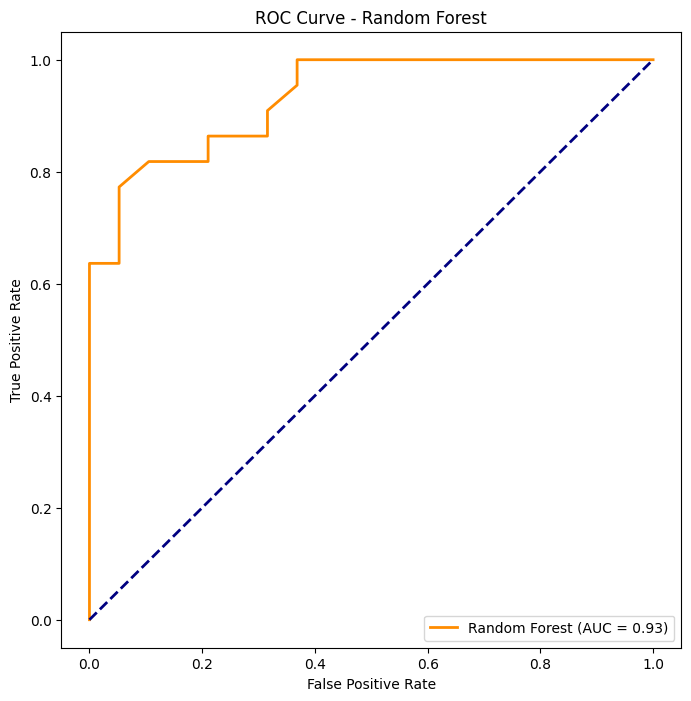

Plotting ROC curve for Support Vector Machine...


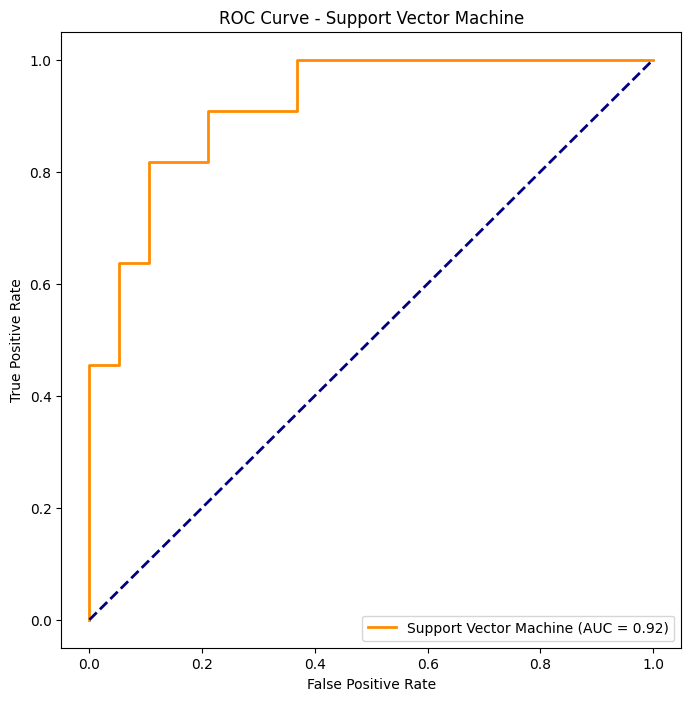

In [35]:
from sklearn.preprocessing import LabelBinarizer

for name, model in models.items():
    print(f"Plotting ROC curve for {name}...")

    # Get predicted probabilities
    y_prob = model.predict_proba(X_test)[:, 1]

    # Encode the target variable using LabelBinarizer
    lb = LabelBinarizer()
    y_test_binary = lb.fit_transform(y_test)

    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(y_test_binary, y_prob)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {name}')
    plt.legend(loc="lower right")
    plt.show()


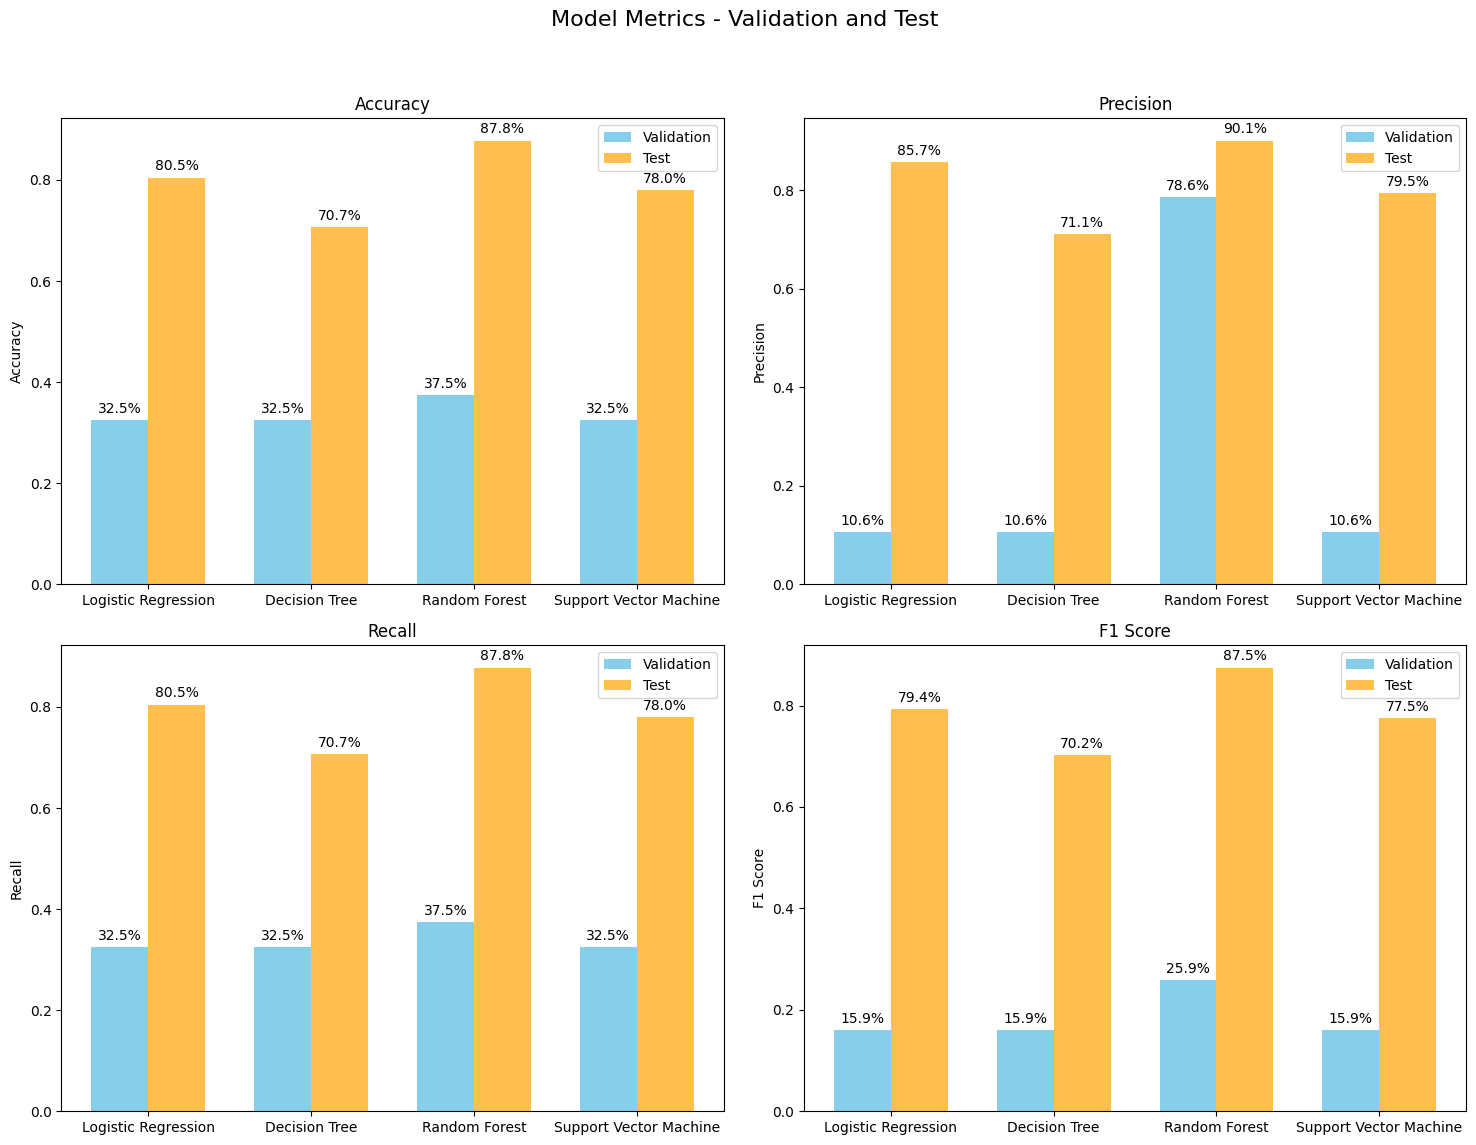

In [91]:
# Initialize lists to store metric scores
models_list = list(models.keys())
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
validation_scores = {metric: [] for metric in metrics}
test_scores = {metric: [] for metric in metrics}

# Loop through models
for name, model in models.items():
    # Testing on validation set
    y_val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_precision = precision_score(y_val, y_val_pred, average='weighted')
    val_recall = recall_score(y_val, y_val_pred, average='weighted')
    val_f1 = f1_score(y_val, y_val_pred, average='weighted')

    # Testing on test set
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, average='weighted')
    test_recall = recall_score(y_test, y_test_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')

    # Append scores to the lists
    validation_scores['Accuracy'].append(val_accuracy)
    validation_scores['Precision'].append(val_precision)
    validation_scores['Recall'].append(val_recall)
    validation_scores['F1 Score'].append(val_f1)

    test_scores['Accuracy'].append(test_accuracy)
    test_scores['Precision'].append(test_precision)
    test_scores['Recall'].append(test_recall)
    test_scores['F1 Score'].append(test_f1)

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Model Metrics - Validation and Test', fontsize=16)

for i, metric in enumerate(metrics):
    row, col = divmod(i, 2)
    bar_width = 0.35  # Set the width of the bars
    x = np.arange(len(models_list))  # X-axis positions for each group

    # Plot validation scores
    val_bars = axs[row, col].bar(x - bar_width/2, validation_scores[metric], bar_width, label='Validation', color='skyblue')

    # Plot test scores
    test_bars = axs[row, col].bar(x + bar_width/2, test_scores[metric], bar_width, label='Test', color='orange', alpha=0.7)

    axs[row, col].set_title(metric)
    axs[row, col].set_xticks(x)
    axs[row, col].set_xticklabels(models_list)
    axs[row, col].set_ylabel(metric)
    axs[row, col].legend()

    # Add percentage annotations on top of the bars
    for bar in val_bars + test_bars:
        height = bar.get_height()
        axs[row, col].annotate(f'{height:.1%}', xy=(bar.get_x() + bar.get_width() / 2, height),
                               xytext=(0, 3),  # 3 points vertical offset
                               textcoords="offset points",
                               ha='center', va='bottom')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [92]:
from IPython.display import display

# Create a DataFrame to store evaluation metrics
metrics_df = pd.DataFrame(columns=['Model', 'Accuracy (Validation)', 'Precision (Validation)', 'Recall (Validation)', 'F1 Score (Validation)',
                                   'Accuracy (Test)', 'Precision (Test)', 'Recall (Test)', 'F1 Score (Test)'])

# Populate the DataFrame with metrics
for name, model in models.items():
    # Validation Set
    y_val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_precision = precision_score(y_val, y_val_pred, average='weighted')
    val_recall = recall_score(y_val, y_val_pred, average='weighted')
    val_f1 = f1_score(y_val, y_val_pred, average='weighted')

    # Test Set
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, average='weighted')
    test_recall = recall_score(y_test, y_test_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')

    # Add metrics to the DataFrame
    metrics_df = metrics_df.append({
        'Model': name,
        'Accuracy (Validation)': val_accuracy,
        'Precision (Validation)': val_precision,
        'Recall (Validation)': val_recall,
        'F1 Score (Validation)': val_f1,
        'Accuracy (Test)': test_accuracy,
        'Precision (Test)': test_precision,
        'Recall (Test)': test_recall,
        'F1 Score (Test)': test_f1
    }, ignore_index=True)

# Display the table
display(metrics_df)

,Model,Accuracy (Validation),Precision (Validation),Recall (Validation),F1 Score (Validation),Accuracy (Test),Precision (Test),Recall (Test),F1 Score (Test)
0,Logistic Regression,0.325,0.105625,0.325,0.159434,0.804878,0.856911,0.804878,0.793871
1,Decision Tree,0.325,0.105625,0.325,0.159434,0.707317,0.711320,0.707317,0.702296
2,Random Forest,0.375,0.786184,0.375,0.258790,0.878049,0.900632,0.878049,0.875032
3,Support Vector Machine,0.325,0.105625,0.325,0.159434,0.780488,0.794683,0.780488,0.775058
